# IMPORTING LIBRARIES

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

# IMPORTING DATASET

In [39]:
#Importing Dataset
dataset = pd.read_csv("diabetes.csv")

# KNOWING DATASET

In [40]:
dataset

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
dataset.head(10)

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [42]:
dataset.tail(10)

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [43]:
dataset.shape

(768, 9)

In [62]:
dataset.describe()

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.161784,70.754427,20.507552,73.066927,32.128099,0.457354,33.172917,0.348958
std,3.336808,31.113478,13.927331,15.829494,92.069945,6.988461,0.281617,11.553000,0.476951
min,0.000000,41.250000,36.800000,0.000000,0.000000,14.280000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,198.000000,105.200000,76.800000,305.400000,49.620000,1.161750,64.800000,1.000000


# MISSING VALUES

In [45]:
dataset.isna().sum()

gnancies     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
dpf          0
age          0
diabetes     0
dtype: int64

In [46]:
dataset.isna().sum()/len(dataset)*100

gnancies     0.0
glucose      0.0
diastolic    0.0
triceps      0.0
insulin      0.0
bmi          0.0
dpf          0.0
age          0.0
diabetes     0.0
dtype: float64

# DATA TYPES

In [48]:
dataset.dtypes

gnancies       int64
glucose        int64
diastolic      int64
triceps        int64
insulin        int64
bmi          float64
dpf          float64
age            int64
diabetes       int64
dtype: object

In [49]:
%matplotlib inline

# CORRELATION 

<AxesSubplot:>

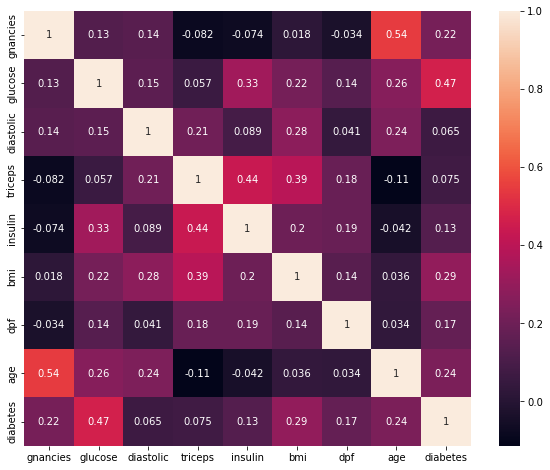

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot = True)

# OUTLIERS

<AxesSubplot:>

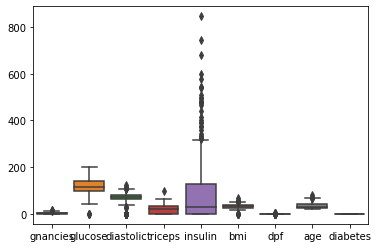

In [53]:
sns.boxplot(data = dataset)

In [56]:
#Replacing the outliers by upperlimit
def Remove_outlier(col):
     Q1,Q3 = np.percentile (col,[25,75])
     IQR = Q3-Q1
     upper_range = Q3+(IQR*1.4)
     lower_range = Q1-(IQR*1.4)
     return upper_range,lower_range
     print("Shape of the Before Outliers:", data.shape)

for i in dataset[['gnancies','glucose','diastolic','triceps','insulin','bmi','dpf','age']]:
    ur,lr = Remove_outlier(dataset[i])
    dataset[i]= np.where(dataset[i]>ur,ur,dataset[i])
    dataset[i]= np.where(dataset[i]<lr,lr,dataset[i])
print("Shape of the After OUtliers:", dataset.shape)

Shape of the After OUtliers: (768, 9)


<AxesSubplot:>

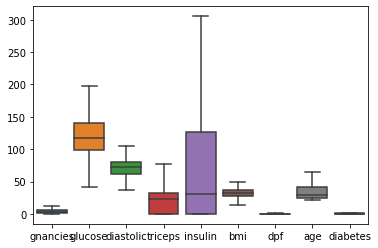

In [58]:
sns.boxplot(data= dataset)

# DISTRIBUTION

E:\anaconda_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Glucose')

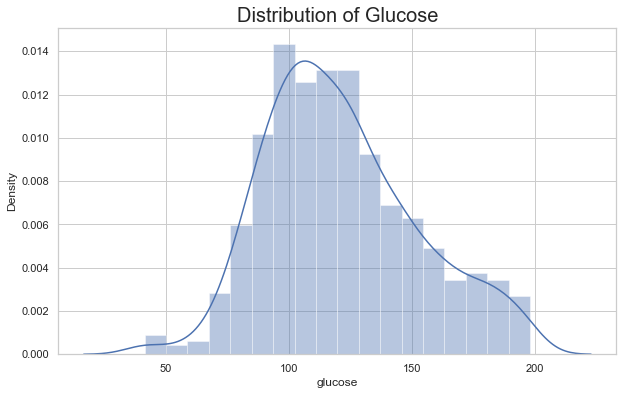

In [60]:
#Distribution of Count_order
plt.figure(figsize=(10,6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['glucose'])
plt.title('Distribution of Glucose', fontsize = 20)